In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
gcr_df=pd.read_csv(r"C:\Users\sinamy\Documents\GreatLearning\24.ExtLab17Feb2019\german_credit.csv")
gcr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [3]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable
gcr_df.sample(n=5)

default account_check_status  duration_in_month  \
128        0    0 <= ... < 200 DM                 12   
855        0  no checking account                 24   
883        0  no checking account                 18   
341        0               < 0 DM                 21   
769        0  no checking account                 12   

                                        credit_history              purpose  \
128  critical account/ other credits existing (not ...           car (used)   
855           existing credits paid back duly till now            car (new)   
883  critical account/ other credits existing (not ...  domestic appliances   
341           existing credits paid back duly till now     radio/television   
769  critical account/ other credits existing (not ...  domestic appliances   

     credit_amount              savings   present_emp_since  \
128           1860         ... < 100 DM          unemployed   
855           1474  100 <= ... < 500 DM       ... < 1 year    
883           1098         ... < 100 DM          unemployed   
341           3599         ... < 100 DM  4 <= ... < 7 years   
769           1655         ... < 100 DM       .. >= 7 years   

     installment_as_income_perc                  personal_status_sex  \
128                           4                        male : single   
855                           4               male : married/widowed   
883                           4  female : divorced/separated/married   
341                           1  female : divorced/separated/married   
769                           2                        male : single   

         ...       present_res_since  \
128      ...                       2   
855      ...                       3   
883      ...                       4   
341      ...                       4   
769      ...                       4   

                                              property age  \
128  if not A121/A122 : car or other, not in attrib...  34   
855                                        real estate  33   
883  if not A121/A122 : car or other, not in attrib...  65   
341  if not A121/A122 : car or other, not in attrib...  26   
769                                        real estate  63   

     other_installment_plans housing credits_this_bank  \
128                     none     own                 2   
855                     none     own                 1   
883                     none     own                 2   
341                     none    rent                 1   
769                     none     own                 2   

                                                   job  \
128  management/ self-employed/ highly qualified em...   
855                        skilled employee / official   
883               unemployed/ unskilled - non-resident   
341                               unskilled - resident   
769                               unskilled - resident   

    people_under_maintenance                                  telephone  \
128                        1  yes, registered under the customers name    
855                        1  yes, registered under the customers name    
883                        1                                       none   
341                        1                                       none   
769                        1  yes, registered under the customers name    

    foreign_worker  
128            yes  
855            yes  
883            yes  
341            yes  
769            yes  

[5 rows x 21 columns]

In [4]:
gcr_df.describe()

default  duration_in_month  credit_amount  \
count  1000.000000        1000.000000    1000.000000   
mean      0.300000          20.903000    3271.258000   
std       0.458487          12.058814    2822.736876   
min       0.000000           4.000000     250.000000   
25%       0.000000          12.000000    1365.500000   
50%       0.000000          18.000000    2319.500000   
75%       1.000000          24.000000    3972.250000   
max       1.000000          72.000000   18424.000000   

       installment_as_income_perc  present_res_since          age  \
count                 1000.000000        1000.000000  1000.000000   
mean                     2.973000           2.845000    35.546000   
std                      1.118715           1.103718    11.375469   
min                      1.000000           1.000000    19.000000   
25%                      2.000000           2.000000    27.000000   
50%                      3.000000           3.000000    33.000000   
75%                      4.000000           4.000000    42.000000   
max                      4.000000           4.000000    75.000000   

       credits_this_bank  people_under_maintenance  
count        1000.000000               1000.000000  
mean            1.407000                  1.155000  
std             0.577654                  0.362086  
min             1.000000                  1.000000  
25%             1.000000                  1.000000  
50%             1.000000                  1.000000  
75%             2.000000                  1.000000  
max             4.000000                  2.000000

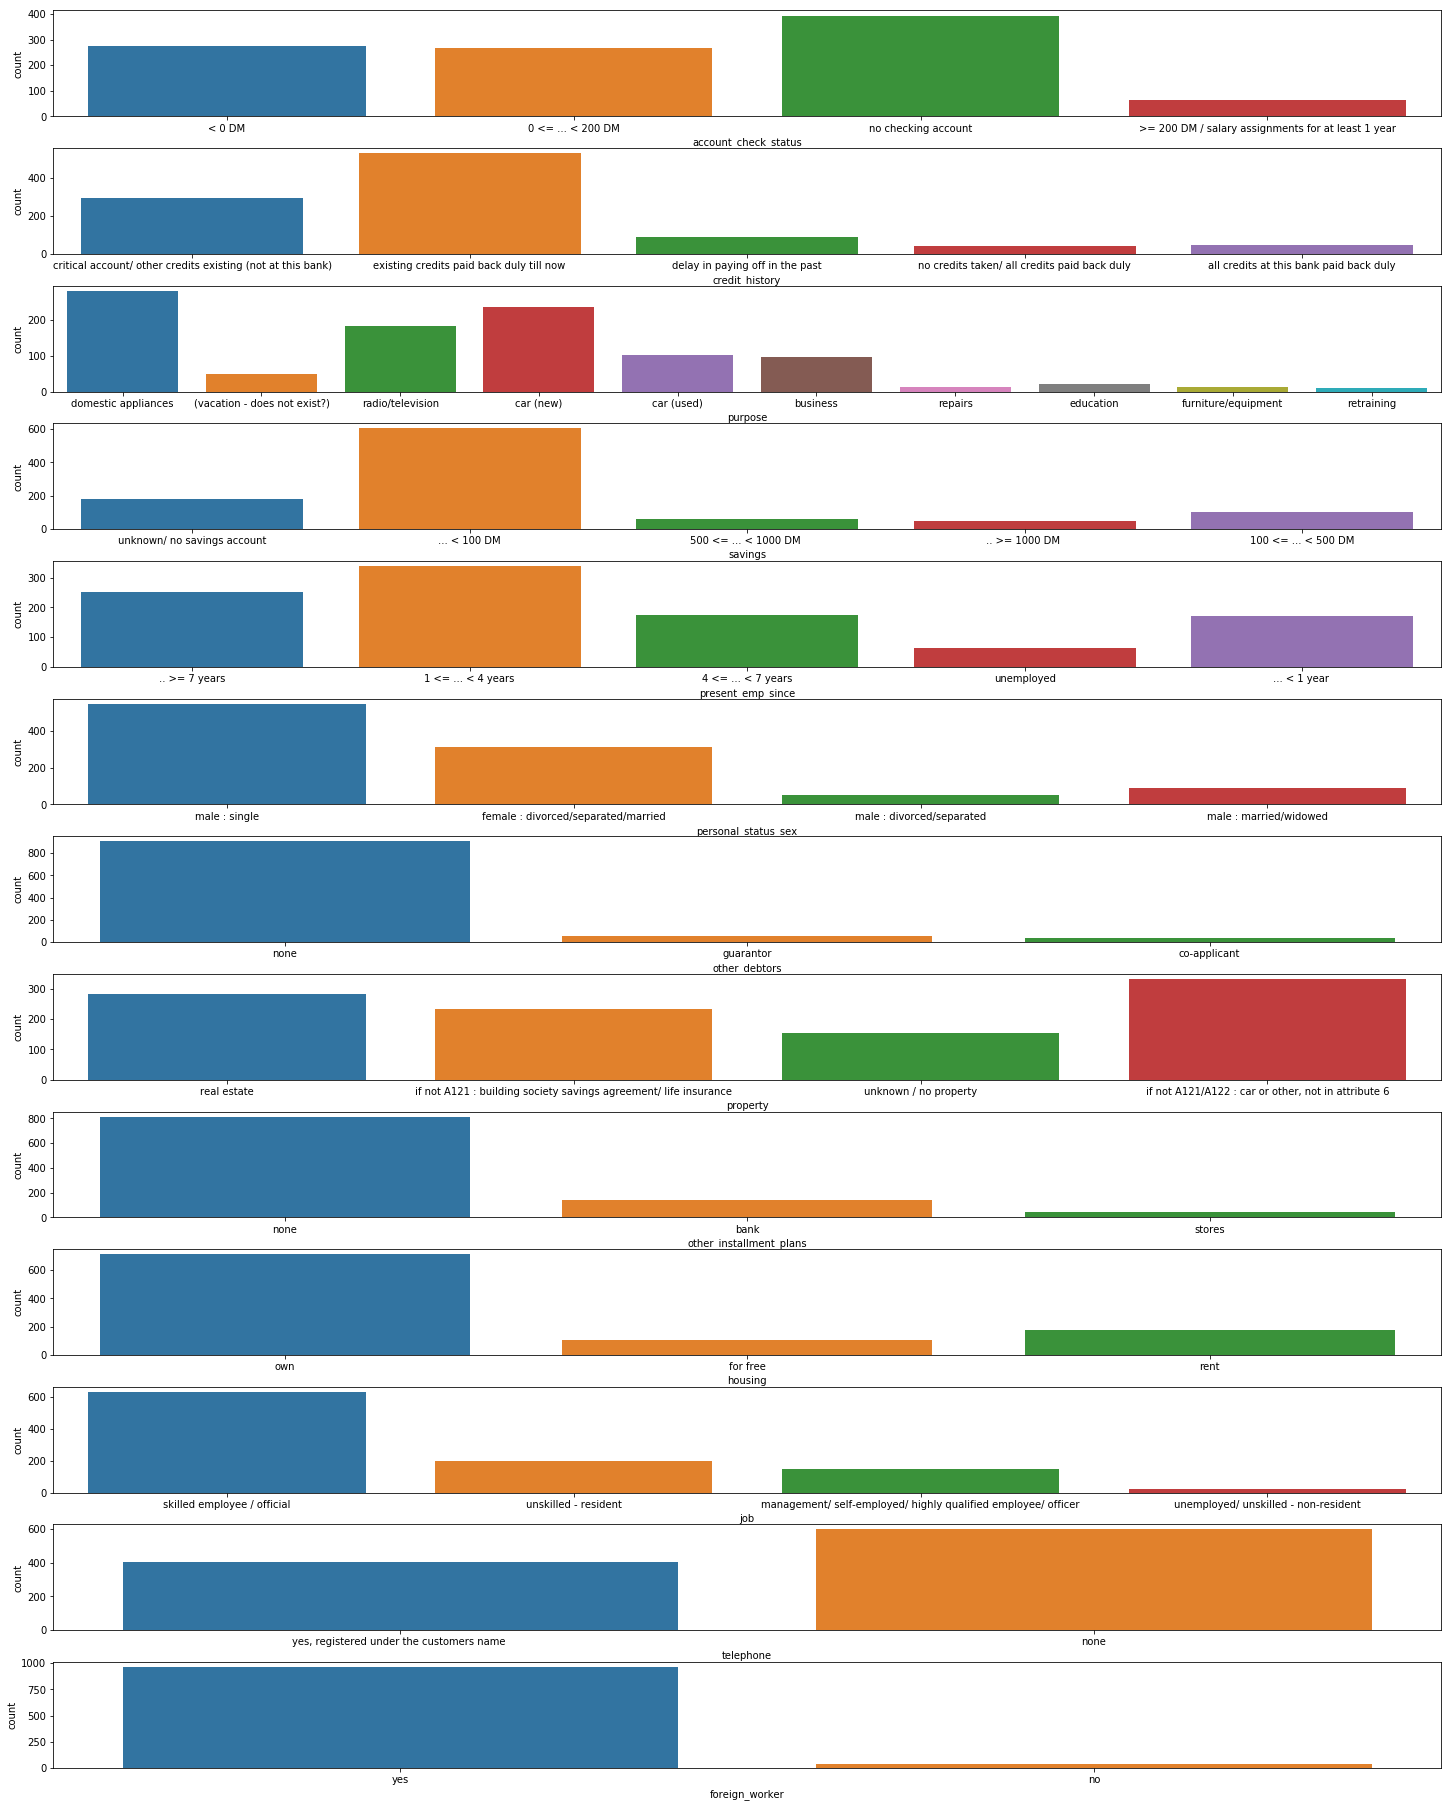

In [5]:
df1 = gcr_df.select_dtypes([np.object])
f, axes = plt.subplots(nrows=13,ncols=1,figsize=(20,25))
f.tight_layout()
plt.tight_layout()
for ax, col in zip(axes.flatten(),df1.columns):
    sns.countplot(gcr_df[col],ax=ax)

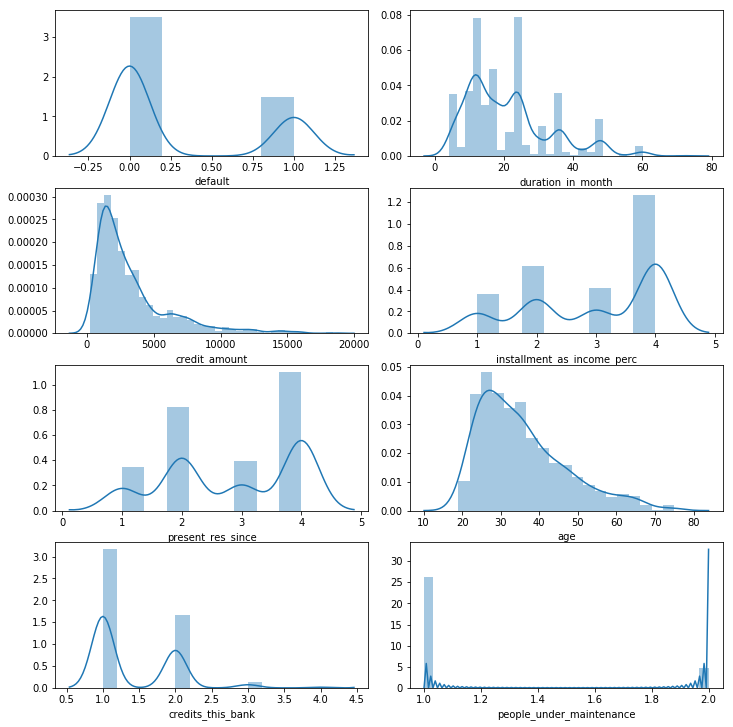

In [6]:
df1 = gcr_df.select_dtypes([np.int64])
f, axes = plt.subplots(nrows=4,ncols=2,figsize=(10,10))
f.tight_layout()
for ax, col in zip(axes.flatten(),df1.columns):
    sns.distplot(gcr_df[col],ax=ax)

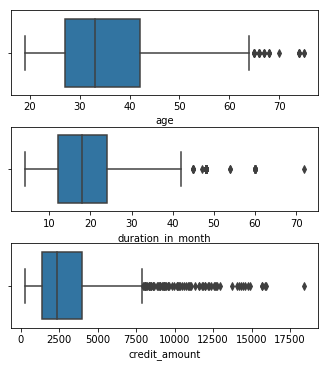

In [7]:
cols = ['age','duration_in_month','credit_amount']
f, axes = plt.subplots(nrows=3,ncols=1,figsize=(5,5))
f.tight_layout()
for ax, col in zip(axes.flatten(),cols):
    sns.boxplot(gcr_df[col],ax=ax)

In [8]:
## Target Variable Frequency Distribution
freq = gcr_df['default'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print(freq)
gcr_df['default'].value_counts().plot('bar')

   default  count  prop
0        0    700   0.7
1        1    300   0.3


In [9]:
#Fine Classing : To gauge importance of variable - if Response Rate Ranks by Independant Variable decile
cols = ['age','duration_in_month','credit_amount','installment_as_income_perc','present_res_since','credits_this_bank',
        'people_under_maintenance']
for i,col in enumerate(cols) :
    gcr_df['decile'] = pd.qcut(gcr_df[col], 10, labels=False,duplicates='drop')
    Rrate = gcr_df.fillna(-1).groupby('decile').apply(lambda x: pd.Series([
        np.min(x[col]),
        np.max(x[col]),
        np.size(x[col]),
        np.sum(x['default']),
        np.size(x['default'][x['default']==0]),],
        index=(["min","max","cnt","cnt_resp","cnt_non_resp"]))).reset_index()
    Rrate["rrate"]=Rrate["cnt_resp"]*100/Rrate["cnt"]
    print('Fine Classing : ',col)
    print(Rrate)

Fine Classing :  age
   decile  min  max  cnt  cnt_resp  cnt_non_resp      rrate
0       0   19   23  105        42            63  40.000000
1       1   24   26  135        52            83  38.518519
2       2   27   28   94        28            66  29.787234
3       3   29   30   77        26            51  33.766234
4       4   31   33  105        33            72  31.428571
5       5   34   36  111        23            88  20.720721
6       6   37   39   74        18            56  24.324324
7       7   40   45  113        31            82  27.433628
8       8   46   52   90        18            72  20.000000
9       9   53   75   96        29            67  30.208333
Fine Classing :  duration_in_month
   decile  min  max  cnt  cnt_resp  cnt_non_resp      rrate
0       0    4    9  143        24           119  16.783217
1       1   10   12  216        52           164  24.074074
2       2   13   15   72        13            59  18.055556
3       3   16   18  115        43          

In [10]:
#Fine Classing : To gauge importance of variable - if Response Rate differs across Independant Variable categories
cols = gcr_df.select_dtypes([np.object]).columns
for i,col in enumerate(cols) :
    ctab = pd.crosstab(gcr_df[col].fillna(''),gcr_df["default"] )
    ctab['RRate'] = ctab[1] *100 / (ctab[1] + ctab[0])
    print(ctab)
    print('------------------------------------------')
    print('')

default                                               0    1      RRate
account_check_status                                                   
0 <= ... < 200 DM                                   164  105  39.033457
< 0 DM                                              139  135  49.270073
>= 200 DM / salary assignments for at least 1 year   49   14  22.222222
no checking account                                 348   46  11.675127
------------------------------------------

default                                               0    1      RRate
credit_history                                                         
all credits at this bank paid back duly              21   28  57.142857
critical account/ other credits existing (not a...  243   50  17.064846
delay in paying off in the past                      60   28  31.818182
existing credits paid back duly till now            361  169  31.886792
no credits taken/ all credits paid back duly         15   25  62.500000
--------------------

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [11]:
y=pd.DataFrame(data=gcr_df['default'],columns=['default'])
X=gcr_df.drop(columns=['default'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(500, 21) (500, 1)
(500, 21) (500, 1)


In [12]:
train=gcr_df.sample(frac=0.5,random_state=200)

In [13]:
freq = train['default'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print(freq)

   default  count   prop
0        0    352  0.704
1        1    148  0.296


In [14]:
# Lets build a Ensemble model but need to modify the dataset first

In [15]:
### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies
train_dummies=pd.get_dummies(data=train)
train_dummies.head()

default  duration_in_month  credit_amount  installment_as_income_perc  \
674        1                 21           2580                           4   
233        0                 18            866                           4   
739        1                 30           4280                           4   
865        0                 15           2221                           2   
523        0                 24           3488                           3   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
674                  2   41                  1                         2   
233                  2   25                  1                         1   
739                  4   26                  2                         1   
865                  4   20                  1                         1   
523                  4   23                  1                         1   

     decile  account_check_status_0 <= ... < 200 DM         ...          \
674       0                                       0         ...           
233       0                                       1         ...           
739       0                                       1         ...           
865       0                                       0         ...           
523       0                                       0         ...           

     housing_own  housing_rent  \
674            1             0   
233            1             0   
739            0             1   
865            0             1   
523            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
674                                                  0                   
233                                                  0                   
739                                                  0                   
865                                                  0                   
523                                                  0                   

     job_skilled employee / official  \
674                                0   
233                                0   
739                                0   
865                                1   
523                                1   

     job_unemployed/ unskilled - non-resident  job_unskilled - resident  \
674                                         0                         1   
233                                         0                         1   
739                                         0                         1   
865                                         0                         0   
523                                         0                         0   

     telephone_none  telephone_yes, registered under the customers name   \
674               1                                                  0     
233               1                                                  0     
739               1                                                  0     
865               1                                                  0     
523               1                                                  0     

     foreign_worker_no  foreign_worker_yes  
674                  0                   1  
233                  0                   1  
739                  0                   1  
865                  0                   1  
523                  0                   1  

[5 rows x 63 columns]

In [16]:
# Print Shape of model data
train_dummies.shape

(500, 63)

In [17]:
train_dummies.drop(columns=['decile'],inplace=True)
train_dummies.shape

(500, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [20]:
plt.figure(figsize = (40,40))
sns.heatmap(train_dummies.corr(), annot=True, cmap='seismic') 

### Drop the original variables which are converted to dummy

In [21]:
#Original varaibles have already been dropped in newly created dataframe

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [22]:
y=pd.DataFrame(data=train_dummies['default'],columns=['default'])
X=train_dummies.drop(columns=['default'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=5)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(250, 61) (250, 1)
(250, 61) (250, 1)


In [23]:
freq = y_train['default'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print(freq)
freq = y_test['default'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print(freq)

   default  count   prop
0        0    177  0.708
1        1     73  0.292
   default  count  prop
0        0    175   0.7
1        1     75   0.3


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # calculate accuracy measures and confusion matrix
#Random forest with 500 estimators
rfcl = RandomForestClassifier(n_estimators = 500,random_state=9999,n_jobs=2,criterion='entropy')
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_train)
print("Accuracy Train: ", rfcl.score(X_train, y_train))
print("Confusion Matrix Train: ")
print(metrics.confusion_matrix(y_train, y_predict))
print("Recall Train: ", metrics.recall_score(y_train, y_predict))
print("Precision Train: ", metrics.precision_score(y_train, y_predict))

Accuracy Train:  1.0
Confusion Matrix Train: 
[[177   0]
 [  0  73]]
Recall Train:  1.0
Precision Train:  1.0


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [25]:
y_predict = rfcl.predict(X_test)
print("Accuracy Test: ", rfcl.score(X_test, y_test))
print("Confusion Matrix Test: ")
print(metrics.confusion_matrix(y_test, y_predict))
print("Recall Test: ", metrics.recall_score(y_test, y_predict))
print("Precision Test: ", metrics.precision_score(y_test, y_predict))

Accuracy Test:  0.72
Confusion Matrix Test: 
[[166   9]
 [ 61  14]]
Recall Test:  0.186666666667
Precision Test:  0.608695652174


### Q6 Show the list of the features importance( 1 Marks)

In [26]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                                                         Imp
credit_amount                                       0.091718
age                                                 0.076895
duration_in_month                                   0.075325
present_res_since                                   0.033767
credit_history_critical account/ other credits ...  0.033532
installment_as_income_perc                          0.030805
account_check_status_no checking account            0.029336
savings_... < 100 DM                                0.024544
account_check_status_< 0 DM                         0.020768
other_installment_plans_none                        0.019523
other_installment_plans_stores                      0.019347
purpose_car (new)                                   0.018209
present_emp_since_1 <= ... < 4 years                0.016799
property_if not A121/A122 : car or other, not i...  0.016707
credit_history_existing credits paid back duly ...  0.016689
job_skilled employee / o

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
# Use below values
num_folds = 10
seed = 77

In [29]:
#Validate the Random Forest model build above using k fold

In [30]:
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
result = cross_val_score(rfcl,train_dummies.iloc[:,1:62], train_dummies.iloc[:,0], cv=kfold)

In [31]:
#Calculate Mean score

In [32]:
result.mean()

0.72399999999999998

In [33]:
# Calculate score standard deviation using std()

In [34]:
result.std()

0.063118935352238004

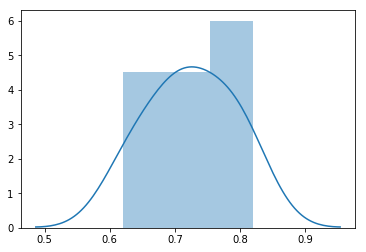

In [35]:
sns.distplot(result)

# Q8 Print the confusion matrix( 1 Marks)

In [36]:
y_predict = rfcl.predict(train_dummies.iloc[:,1:62])
print("Confusion Matrix: ")
print(metrics.confusion_matrix(train_dummies['default'], y_predict))

Confusion Matrix: 
[[343   9]
 [ 61  87]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [37]:
print("Accuracy Train: ", rfcl.score(train_dummies.iloc[:,1:62],train_dummies['default']))

Accuracy Train:  0.86


In [38]:
print("Recall: ", metrics.recall_score(train_dummies['default'], y_predict))
print("Precision: ", metrics.precision_score(train_dummies['default'], y_predict))

Recall:  0.587837837838
Precision:  0.90625


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [39]:
#Hint: Use roc_curve

In [40]:
from sklearn.metrics import roc_curve
y_predict = rfcl.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train['default'], y_predict)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [41]:
from sklearn.metrics import roc_curve
y_predict = rfcl.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test['default'], y_predict)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

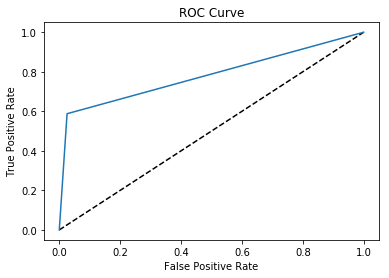

In [42]:
from sklearn.metrics import roc_curve
y_predict = rfcl.predict(train_dummies.iloc[:,1:62])
fpr, tpr, thresholds = roc_curve(train_dummies['default'], y_predict)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [43]:
from sklearn.metrics import roc_auc_score
y_predict = rfcl.predict(X_train)
auc = roc_auc_score(y_train,y_predict)
print("AUC Train: ", auc)

AUC Train:  1.0


In [44]:
from sklearn.metrics import roc_auc_score
y_predict = rfcl.predict(X_test)
auc = roc_auc_score(y_test,y_predict)
print("AUC Test: ", auc)

AUC Test:  0.567619047619


In [45]:
from sklearn.metrics import roc_auc_score
y_predict = rfcl.predict(train_dummies.iloc[:,1:62])
auc = roc_auc_score(train_dummies["default"],y_predict)
print("AUC: ", auc)

AUC:  0.78113482801


In [69]:
#Regularization
f = open(r"C:\Users\sinamy\Documents\GreatLearning\24.ExtLab17Feb2019\rf.csv",'w')
depth = np.arange(2,15,2)
leaf_size = np.arange(10,15,1)
no_of_trees = np.arange(50,1001,50)
for k in depth :
    for j in leaf_size :
        for i in no_of_trees :
            rfcl = RandomForestClassifier(random_state=9999,n_jobs=10,criterion = 'entropy',max_depth=k,min_samples_leaf=j,n_estimators=i,max_features=None)
            rfcl.fit(X_train, y_train)
            y_predict_train = rfcl.predict(X_train)
            y_predict_test = rfcl.predict(X_test)
            print('Depth ,',k,
                  ',Leaf Min Sample ,',j,
                  ',No of Trees ,',i,
                  ',Score Train ,', rfcl.score(X_train, y_train),
                  ',Score Test ,', rfcl.score(X_test , y_test),
                  ',Precision Train ,', metrics.precision_score(y_train, y_predict_train),
                  ',Recall Train ,', metrics.recall_score(y_train, y_predict_train),
                  ',Precision Test ,', metrics.precision_score(y_test, y_predict_test),
                  ',Recall Test ,', metrics.recall_score(y_test, y_predict_test),
                  file=f)
f.close()

Best Params
Depth 	        6	
Leaf Min Sample 10	
No of Trees 	300	
Score Train 	82%	
Score Test 	    75%	
Precision Train 91%	
Recall Train 	44%	
Precision Test 	75%	
Recall Test 	24%

In [85]:
rfcl = RandomForestClassifier(random_state=9999,n_jobs=10,criterion = 'gini',max_depth=6,min_samples_leaf=10,
                              n_estimators=300,max_features=None)
rfcl.fit(X_train, y_train)
y_predict_test = rfcl.predict(X_test)
metrics.confusion_matrix(y_test, y_predict_test)

array([[169,   6],
       [ 57,  18]], dtype=int64)

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Use below values
num_folds = 10
seed = 77
rfcl = RandomForestClassifier(random_state=9999,n_jobs=10,criterion = 'gini',max_depth=6,min_samples_leaf=10,
                              n_estimators=300,max_features=None)
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
result = cross_val_score(rfcl,train_dummies.iloc[:,1:62], train_dummies.iloc[:,0], cv=kfold)
print(result.mean())
print(result.std())

0.7
0.0579655069848


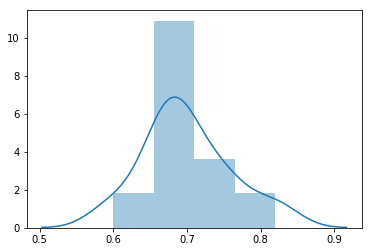

In [84]:
sns.distplot(result)

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
# Number of iterations for bootstrapping
bootstrap_iteration = 10
n_size = int(train_dummies.shape[0] * 0.7)    # picking only 70 % of the given data in every bootstrap sample
values = train_dummies.values
# run bootstrap
stats = list()
for i in range(bootstrap_iteration):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
    model = DecisionTreeClassifier(criterion = 'entropy')
    model.fit(train[:,1:62], train[:,0])

    # evaluate model
    predictions = model.predict(test[:,1:62])
    score = accuracy_score(test[:,0], predictions)    # caution, overall accuracy score can mislead when classes are imbalanced
    print(score)
    stats.append(score)

0.628571428571
0.688461538462
0.640167364017
0.659836065574
0.657142857143
0.646586345382
0.678571428571
0.627530364372
0.631782945736
0.617529880478


In [81]:
print('Avg. Accuracy : ',score.mean())

Avg. Accuracy :  0.617529880478


In [82]:
# plot scores
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

95.0 confidence interval 62.0% and 68.6%
